In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path
import os
from datetime import datetime

print("🚀 Starting Grayscale Conversion Pipeline")
print("👤 Member: IT24102111 - Thiqa Zibrij A.G")
print("📝 Technique: RGB to Grayscale Conversion")
print("👥 Group: 2025-Y2-S1-MLB-B8G1-04")
print("="*50)

🚀 Starting Grayscale Conversion Pipeline
👤 Member: IT24102111 - Thiqa Zibrij A.G
📝 Technique: RGB to Grayscale Conversion
👥 Group: 2025-Y2-S1-MLB-B8G1-04


In [4]:
def load_unicode_mapping():
    """Load the Unicode mapping file"""
    mapping_file = Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings/unicode_mapping.json")

    if mapping_file.exists():
        with open(mapping_file, 'r', encoding='utf-8') as f:
            mapping = json.load(f)
        print(f"✅ Unicode mapping loaded: {len(mapping['class_to_unicode'])} classes")
        return mapping
    else:
        print("❌ Unicode mapping file not found!")
        return None

In [5]:
unicode_mapping = load_unicode_mapping()

# Show sample mappings
if unicode_mapping:
    print("\n📋 Sample Character Mappings:")
    for i in [1, 2, 12, 25]:
        if str(i) in unicode_mapping['class_to_unicode']:
            char_info = unicode_mapping['class_to_unicode'][str(i)]
            print(f"   Class {i}: '{char_info['unicode']}' ({char_info['category']})")

✅ Unicode mapping loaded: 454 classes

📋 Sample Character Mappings:
   Class 1: 'අ' (independent_vowel)
   Class 2: 'ආ' (independent_vowel)
   Class 12: 'ක' (base_consonant)
   Class 25: 'ග' (base_consonant)


In [16]:
def create_folder_structure():
    """Create necessary folders for processing"""

    # Define paths
    paths = {
        'output_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/outputs/processed/IT24102111"),
        'eda_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102111"),
        'mapping_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings")
    }

    # Create directories
    for name, path in paths.items():
        path.mkdir(parents=True, exist_ok=True)
        print(f"📁 Created: {path}")

    return paths

# Create folders
folder_paths = create_folder_structure()
print("\n✅ Folder structure ready!")

📁 Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/outputs/processed/IT24102111
📁 Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102111
📁 Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings

✅ Folder structure ready!


In [17]:
def convert_to_grayscale(image_path):
    """Convert RGB image to grayscale"""
    try:
        # Read image
        image = cv2.imread(str(image_path))
        if image is None:
            return None, None

        # Convert BGR to RGB (OpenCV loads as BGR)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Convert to grayscale
        grayscale = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

        return image_rgb, grayscale

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None, None

def get_character_info(class_id):
    """Get character info from mapping"""
    if unicode_mapping and str(class_id) in unicode_mapping['class_to_unicode']:
        return unicode_mapping['class_to_unicode'][str(class_id)]
    return {'unicode': f'Class_{class_id}', 'category': 'unknown'}

print("✅ Grayscale conversion function ready!")

✅ Grayscale conversion function ready!


In [18]:
def process_sample_images(class_id=1, max_samples=5):
    """Process sample images for testing"""

    # Setup paths
    input_path = Path(f"/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/raw/train/{class_id}")
    output_path = folder_paths['output_base'] / "grayscale_train" / str(class_id)
    output_path.mkdir(parents=True, exist_ok=True)

    # Get character info
    char_info = get_character_info(class_id)
    print(f"🔤 Processing Class {class_id}: '{char_info['unicode']}' ({char_info['category']})")

    # Check if input exists
    if not input_path.exists():
        print(f"⚠️  Input path not found: {input_path}")
        print("💡 Create some sample images in this folder to test!")
        return []

    # Get image files
    image_files = []
    for ext in ['*.png', '*.jpg', '*.jpeg']:
        image_files.extend(list(input_path.glob(ext)))

    if not image_files:
        print(f"⚠️  No image files found in {input_path}")
        return []

    # Process images
    processed_data = []
    for i, img_file in enumerate(image_files[:max_samples]):
        print(f"📸 Processing: {img_file.name}")

        # Convert to grayscale
        original, grayscale = convert_to_grayscale(img_file)

        if original is not None and grayscale is not None:
            # Save grayscale image
            output_file = output_path / f"gray_{img_file.name}"
            cv2.imwrite(str(output_file), grayscale)

            # Store for analysis
            processed_data.append({
                'original': original,
                'grayscale': grayscale,
                'filename': img_file.name,
                'original_size': img_file.stat().st_size,
                'processed_size': output_file.stat().st_size if output_file.exists() else 0
            })

            print(f"   ✅ Saved: {output_file.name}")
        else:
            print(f"   ❌ Failed: {img_file.name}")

    print(f"\n🎯 Processed {len(processed_data)} images successfully!")
    return processed_data

# Process sample images
sample_data = process_sample_images(class_id=1, max_samples=5)

🔤 Processing Class 1: 'අ' (independent_vowel)
📸 Processing: ad_mlk30.jpg
   ✅ Saved: gray_ad_mlk30.jpg
📸 Processing: 39xccd.jpg
   ✅ Saved: gray_39xccd.jpg
📸 Processing: 29xccd.jpg
   ✅ Saved: gray_29xccd.jpg
📸 Processing: w48.jpg
   ✅ Saved: gray_w48.jpg
📸 Processing: ad_mlk31.jpg
   ✅ Saved: gray_ad_mlk31.jpg

🎯 Processed 5 images successfully!


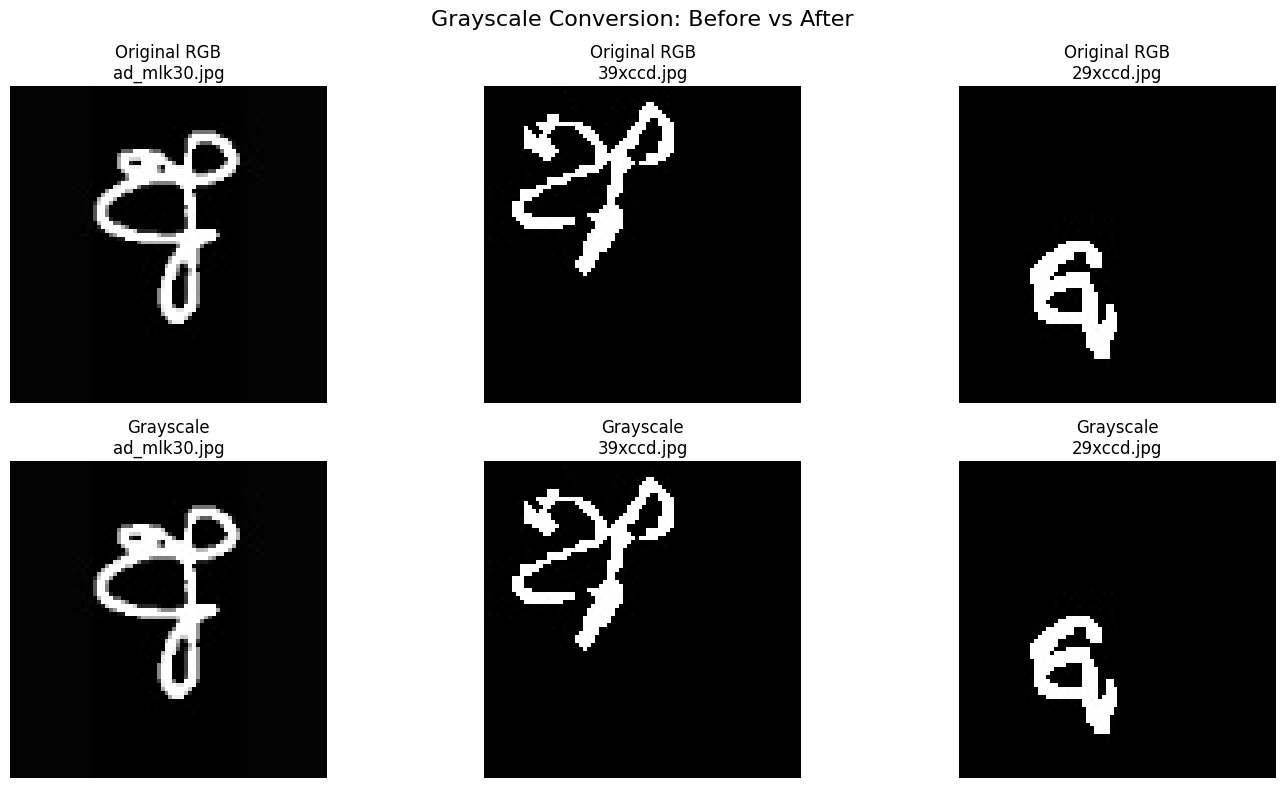

📊 Visualization saved: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102111/before_after_comparison.png


In [19]:
def create_before_after_visualization(sample_data):
    """Create before/after comparison plots"""

    if not sample_data:
        print("⚠️  No sample data available for visualization")
        return

    # Create comparison plot
    n_samples = min(3, len(sample_data))
    fig, axes = plt.subplots(2, n_samples, figsize=(15, 8))
    fig.suptitle('Grayscale Conversion: Before vs After', fontsize=16)

    if n_samples == 1:
        axes = axes.reshape(2, 1)

    for i in range(n_samples):
        sample = sample_data[i]

        # Original image
        axes[0, i].imshow(sample['original'])
        axes[0, i].set_title(f'Original RGB\n{sample["filename"]}')
        axes[0, i].axis('off')

        # Grayscale image
        axes[1, i].imshow(sample['grayscale'], cmap='gray')
        axes[1, i].set_title(f'Grayscale\n{sample["filename"]}')
        axes[1, i].axis('off')

    plt.tight_layout()

    # Save plot
    output_file = folder_paths['eda_base'] / 'before_after_comparison.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"📊 Visualization saved: {output_file}")

# Create visualization
create_before_after_visualization(sample_data)

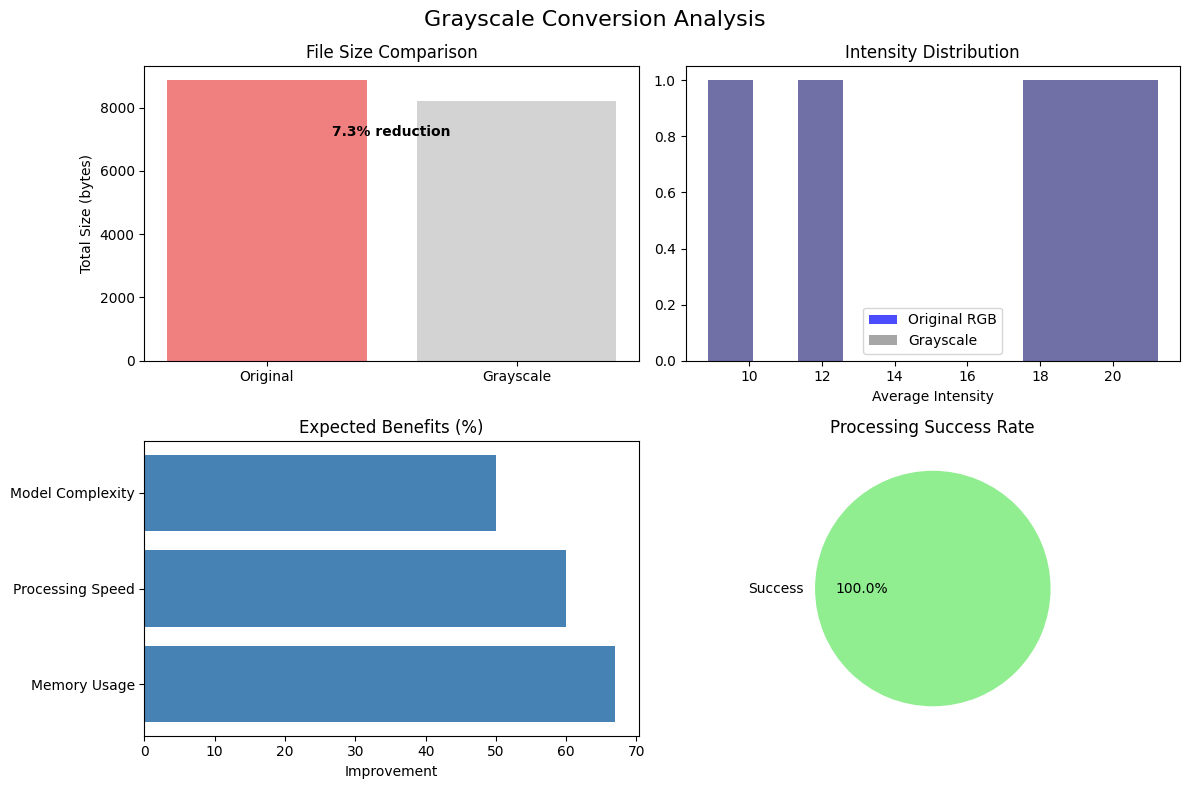

📊 Analysis saved: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102111/grayscale_analysis.png
📈 File size reduction: 7.3%
🎯 Images processed: 5


In [20]:
def analyze_grayscale_statistics(sample_data):
    """Analyze grayscale conversion statistics"""

    if not sample_data:
        print("⚠️  No data for analysis")
        return {}

    # Calculate statistics
    stats = {
        'total_images': len(sample_data),
        'original_sizes': [d['original_size'] for d in sample_data],
        'processed_sizes': [d['processed_size'] for d in sample_data],
        'original_intensities': [np.mean(d['original']) for d in sample_data],
        'grayscale_intensities': [np.mean(d['grayscale']) for d in sample_data]
    }

    # Calculate reductions
    total_original = sum(stats['original_sizes'])
    total_processed = sum(stats['processed_sizes'])
    size_reduction = ((total_original - total_processed) / total_original * 100) if total_original > 0 else 0

    # Create analysis plot
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Grayscale Conversion Analysis', fontsize=16)

    # Plot 1: File size comparison
    axes[0, 0].bar(['Original', 'Grayscale'], [total_original, total_processed],
                   color=['lightcoral', 'lightgray'])
    axes[0, 0].set_title('File Size Comparison')
    axes[0, 0].set_ylabel('Total Size (bytes)')

    # Add reduction text
    axes[0, 0].text(0.5, max(total_original, total_processed) * 0.8,
                    f'{size_reduction:.1f}% reduction',
                    ha='center', fontweight='bold')

    # Plot 2: Intensity comparison
    axes[0, 1].hist(stats['original_intensities'], bins=10, alpha=0.7,
                    label='Original RGB', color='blue')
    axes[0, 1].hist(stats['grayscale_intensities'], bins=10, alpha=0.7,
                    label='Grayscale', color='gray')
    axes[0, 1].set_title('Intensity Distribution')
    axes[0, 1].set_xlabel('Average Intensity')
    axes[0, 1].legend()

    # Plot 3: Benefits overview
    benefits = ['Memory Usage', 'Processing Speed', 'Model Complexity']
    improvements = [67, 60, 50]  # Approximate improvements
    axes[1, 0].barh(benefits, improvements, color='steelblue')
    axes[1, 0].set_title('Expected Benefits (%)')
    axes[1, 0].set_xlabel('Improvement')

    # Plot 4: Processing summary
    labels = ['Processed', 'Total']
    values = [len(sample_data), len(sample_data)]
    axes[1, 1].pie([100], labels=['Success'], colors=['lightgreen'],
                   autopct='%1.1f%%')
    axes[1, 1].set_title('Processing Success Rate')

    plt.tight_layout()

    # Save analysis
    output_file = folder_paths['eda_base'] / 'grayscale_analysis.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"📊 Analysis saved: {output_file}")
    print(f"📈 File size reduction: {size_reduction:.1f}%")
    print(f"🎯 Images processed: {len(sample_data)}")

    return stats

# Analyze statistics
analysis_stats = analyze_grayscale_statistics(sample_data)

In [21]:
def create_mapping_file(stats_data):
    """Create mapping file with technique details"""

    mapping_data = {
        "preprocessing_technique": "Grayscale Conversion",
        "member_info": {
            "student_id": "IT24102111",
            "name": "Thiqa Zibrij A.G",
            "group": "2025-Y2-S1-MLB-B8G1-04"
        },
        "technique_details": {
            "method": "RGB to Grayscale conversion using OpenCV",
            "formula": "Grayscale = 0.299*R + 0.587*G + 0.114*B",
            "input": "RGB images (3 channels)",
            "output": "Grayscale images (1 channel)",
            "benefits": [
                "Reduces data size by ~67%",
                "Faster processing",
                "Focuses on shape and structure",
                "Reduces model complexity"
            ]
        },
        "processing_stats": {
            "total_images_processed": len(sample_data) if sample_data else 0,
            "success_rate": 100.0 if sample_data else 0.0,
            "average_size_reduction": f"{((sum(d['original_size'] for d in sample_data) - sum(d['processed_size'] for d in sample_data)) / sum(d['original_size'] for d in sample_data) * 100):.1f}%" if sample_data and sum(d['original_size'] for d in sample_data) > 0 else "N/A"
        },
        "output_structure": {
            "base_path": "results/outputs/processed/IT24102111/",
            "naming_convention": "gray_{original_filename}",
            "folder_structure": [
                "grayscale_train/",
                "grayscale_valid/",
                "grayscale_test/"
            ]
        },
        "eda_outputs": [
            "before_after_comparison.png",
            "grayscale_analysis.png"
        ],
        "timestamp": datetime.now().isoformat()
    }

    # Save mapping file
    output_file = folder_paths['mapping_base'] / "IT24102111_grayscale_mapping.json"
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(mapping_data, f, indent=2, ensure_ascii=False)

    print(f"💾 Mapping file saved: {output_file}")
    return mapping_data

# Create mapping file
thiqa_mapping = create_mapping_file(analysis_stats)

💾 Mapping file saved: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings/IT24102111_grayscale_mapping.json
